Line and Scatter Plots
==================

This lesson discusses creating plots using `matplotlib`'s object oriented interface. "Object oriented" here refers to the fact that when we use this interface, the figure, figure axes and other plot components will be available to use as variables or objects. Using matplotlib this way will allow us to have greater control over our plots. 

Let's see how we can make the same plots we made with the procedural interface using an object oriented approach.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

s_orbitals = pd.read_csv("s_orbitals_1D.csv")

In [2]:
s_orbitals.head()

r        1s        2s        3s
0  0.000000  0.564190  0.199471  0.108578
1  0.517241  0.336349  0.114183  0.061683
2  1.034483  0.200519  0.057408  0.029966
3  1.551724  0.119542  0.020580  0.009313
4  2.068966  0.071266 -0.002445 -0.003390

In [3]:
%matplotlib notebook

Creating Figures and Axes
--------------------------------

Next, we use matplotlib to create an empty figure using the function `plt.subplots`. This function returns two values - the figure object, and the axis.

<IPython.core.display.Javascript object>


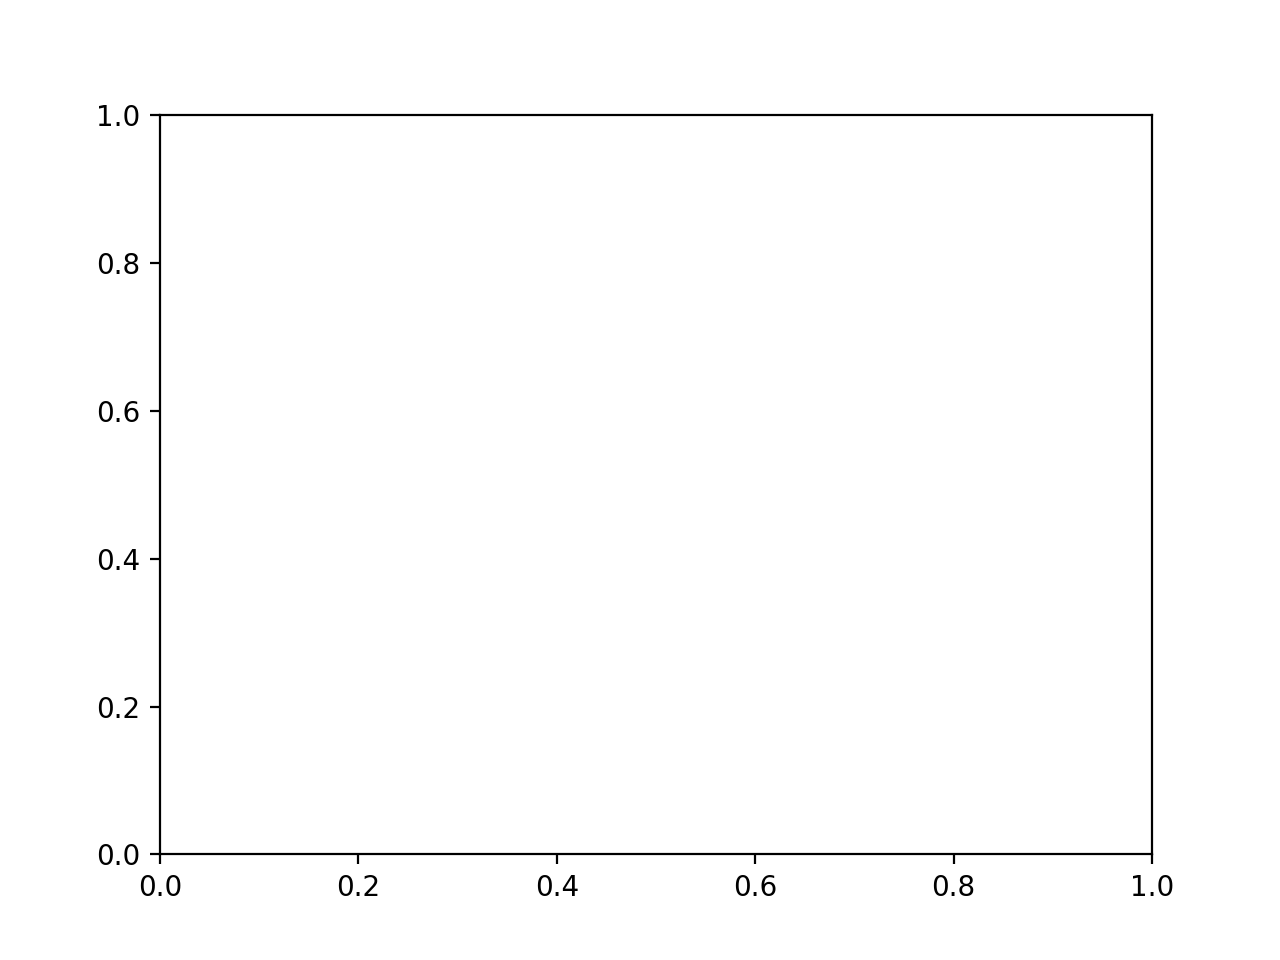

In [4]:
fig, ax = plt.subplots()

You can see a blank figure which matplotlib has created, above. This figure doesn't have any data yet because we haven't added it. We will add a line plot data to our figure axis using the command `ax.plot`. This differs from the procedural interface discussed previously in that it uses the variable `ax` which was returned from `plt.subplots` instead of using `plt.plot`, which is the `matplotlib` function. In the `plot` command, you first list the x values to plot, followed by the y values.

<IPython.core.display.Javascript object>


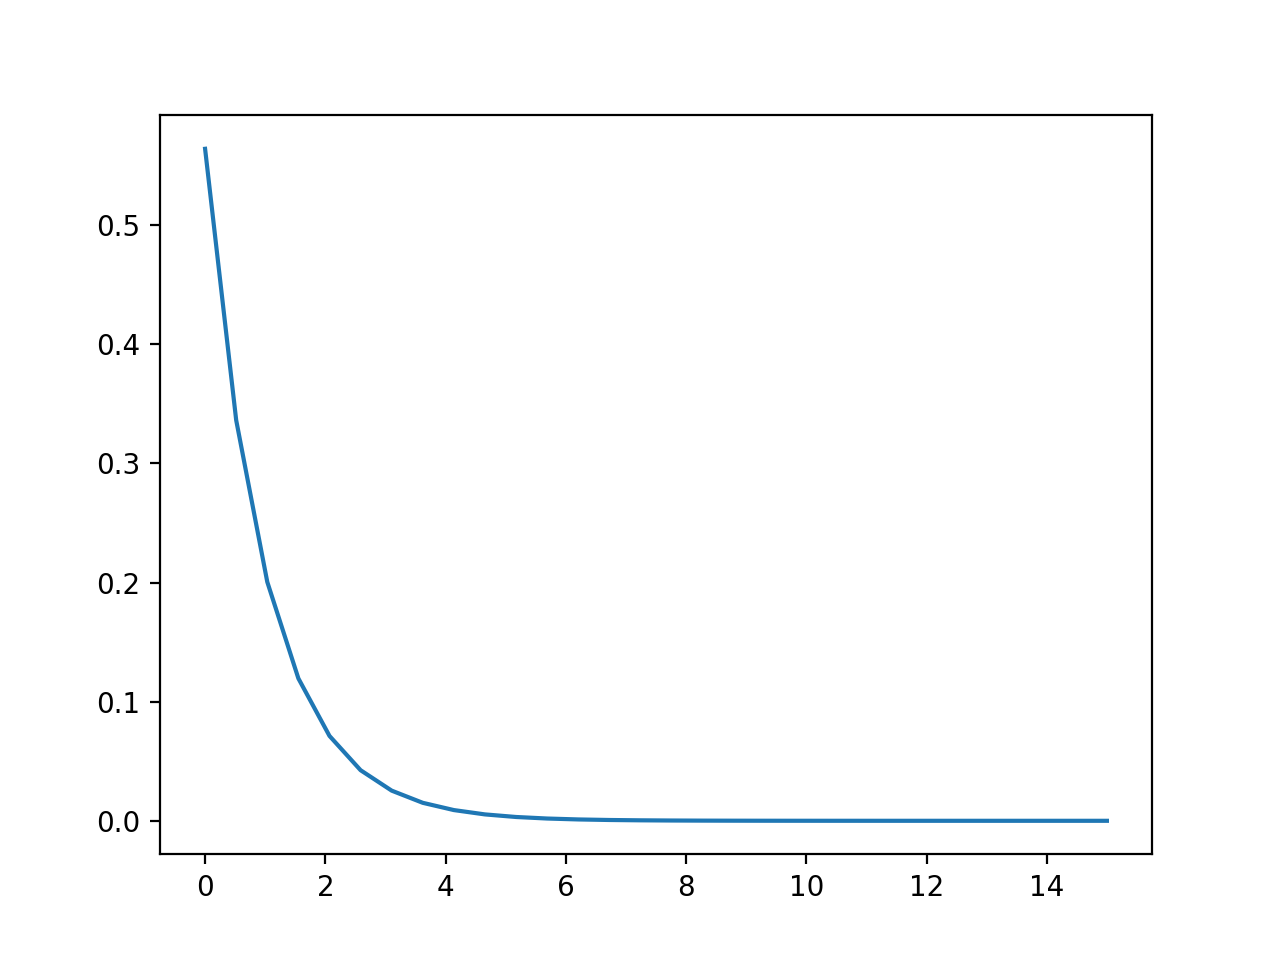

In [5]:
fig, ax = plt.subplots()
ax.plot(s_orbitals["r"], s_orbitals["1s"])

When we are using labled data like a `pandas` dataframe, we can shorten having to type the dataframe variable multiple times by using a different plotting syntax. We will first give the column name which represents `x`, then the column name which represents `y`, then we give the dataframe name to the `data` argument.

<IPython.core.display.Javascript object>


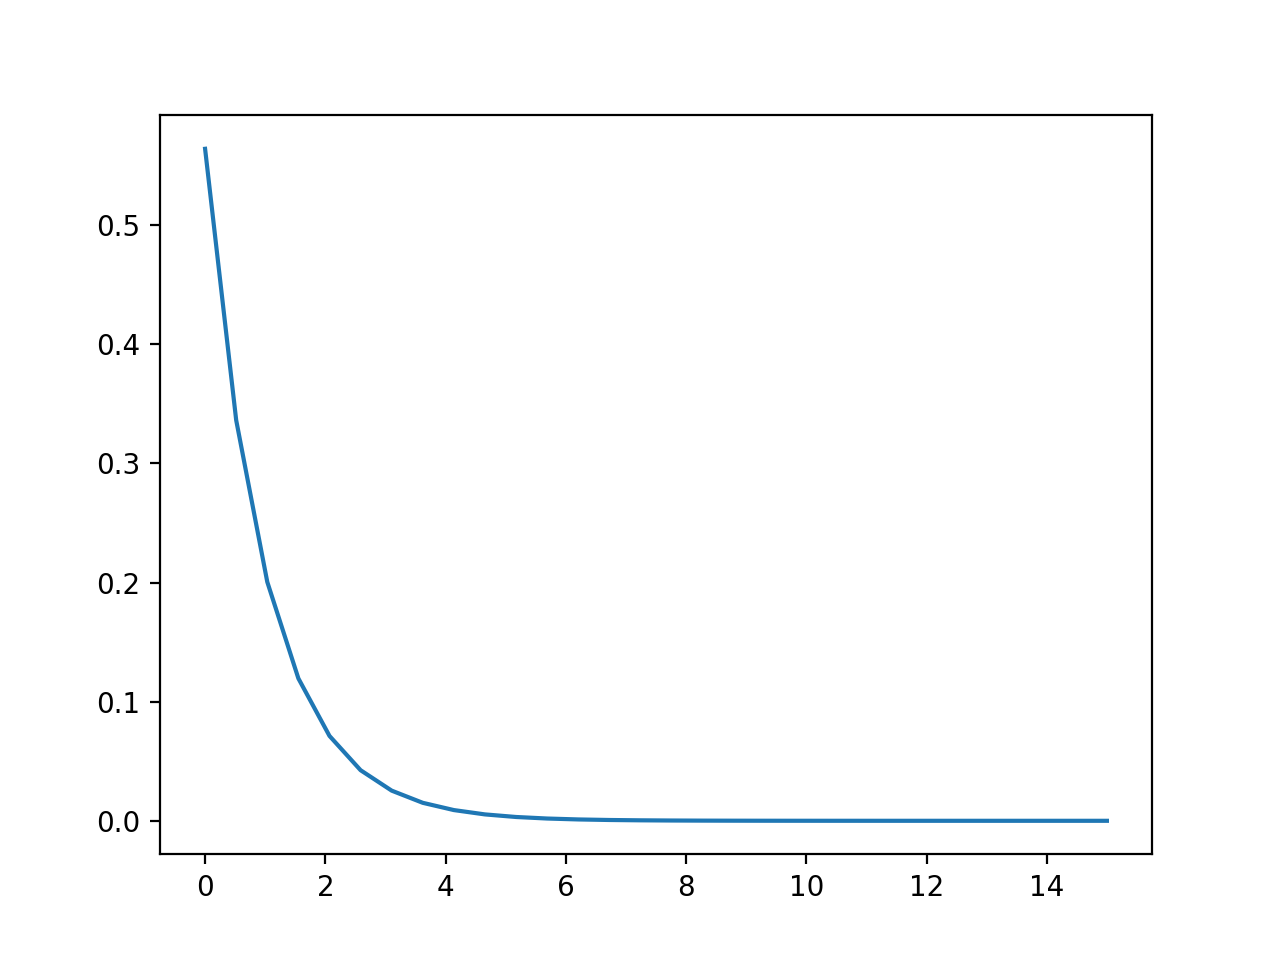

In [6]:
fig, ax = plt.subplots()
ax.plot("r", "1s", data=s_orbitals)

You can add additional lines to the figure by adding more `plot` commands with different data.

<IPython.core.display.Javascript object>


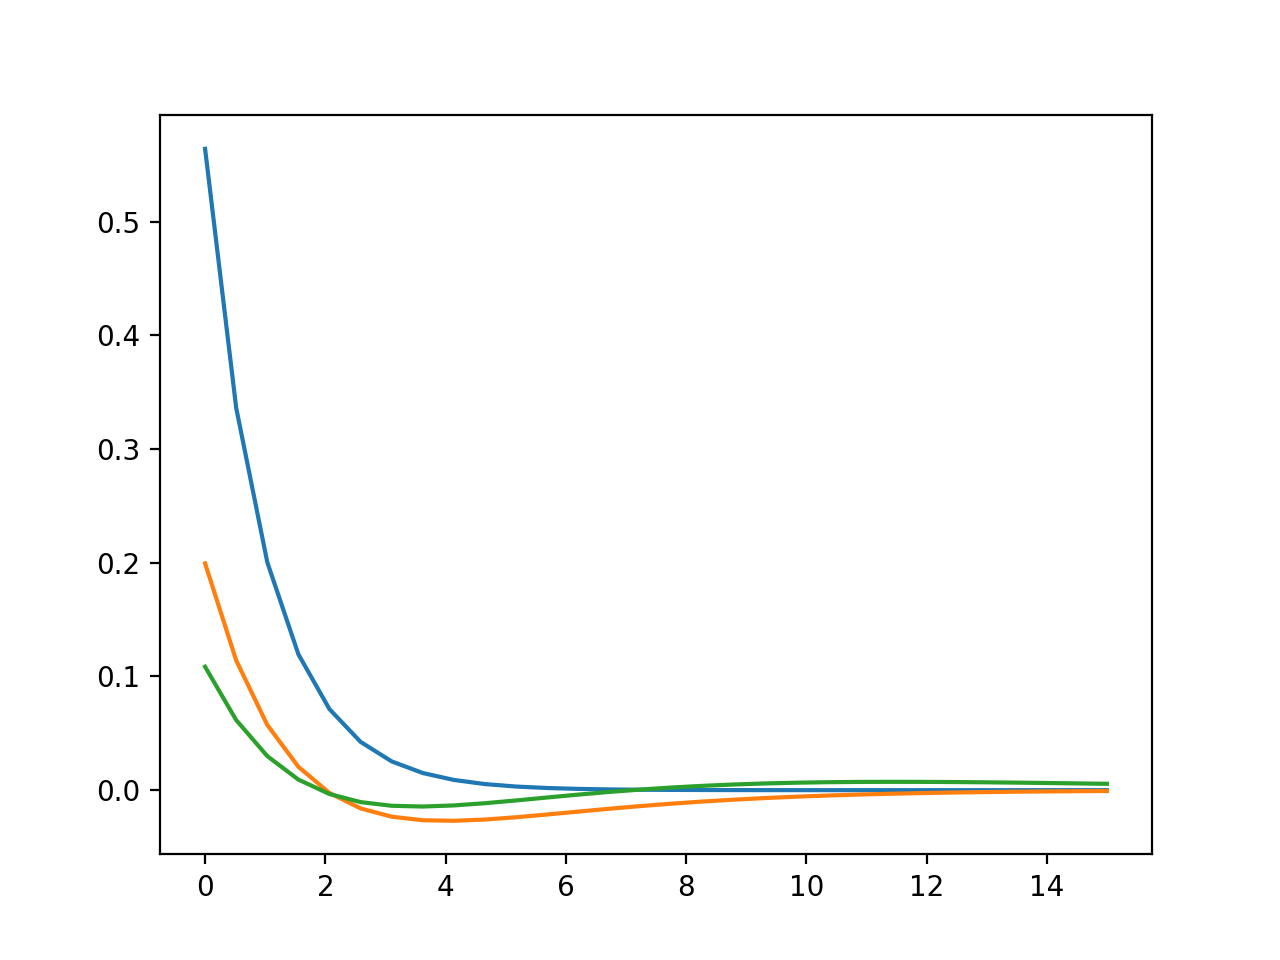

In [7]:
fig2, ax2 = plt.subplots()
ax2.plot("r", "1s", data=s_orbitals)
ax2.plot("r", "2s", data=s_orbitals)
ax2.plot("r", "3s", data=s_orbitals)

```{note}
If you wanted to make a scatter plot with the data instead, you would switch your plot command from `ax.plot` to `ax.scatter`. You can even combine `ax.scatter` with `ax.plot` in order to get the same data plotted with both. You can try out this example

    fig, ax = plt.subplots()
    ax.scatter("r", "1s", data=s_orbitals)

```

The difference between this `object oriented` and procedural interface is that now we can add or manipulate figures we have already created, as long as they are stored as variables. Try this code to see what happends to `Figure 1`.

```python

ax.scatter("r", "1s", data=s_orbitals)
```



Customizing Plot Appearance
-----------------------------------

Matplotlib offers a lot of control over the way your plot appears. We will discuss some topics here including:

1. Setting plot colors
1. Setting labels and legends
1. Setting x and y axis ranges


### Setting Plot Colors 

You can change the color of an individual line by setting the line color property. You can use either a built-in name for the color, or you can specify the [hex value](https://www.rgbtohex.net/). You can find a list of named colors in the [matplotlib documentation](https://matplotlib.org/stable/gallery/color/named_colors.html).



You can use hex values for complete control over colors. For example, we could choose to use MolSSI colors on our plot:

<IPython.core.display.Javascript object>


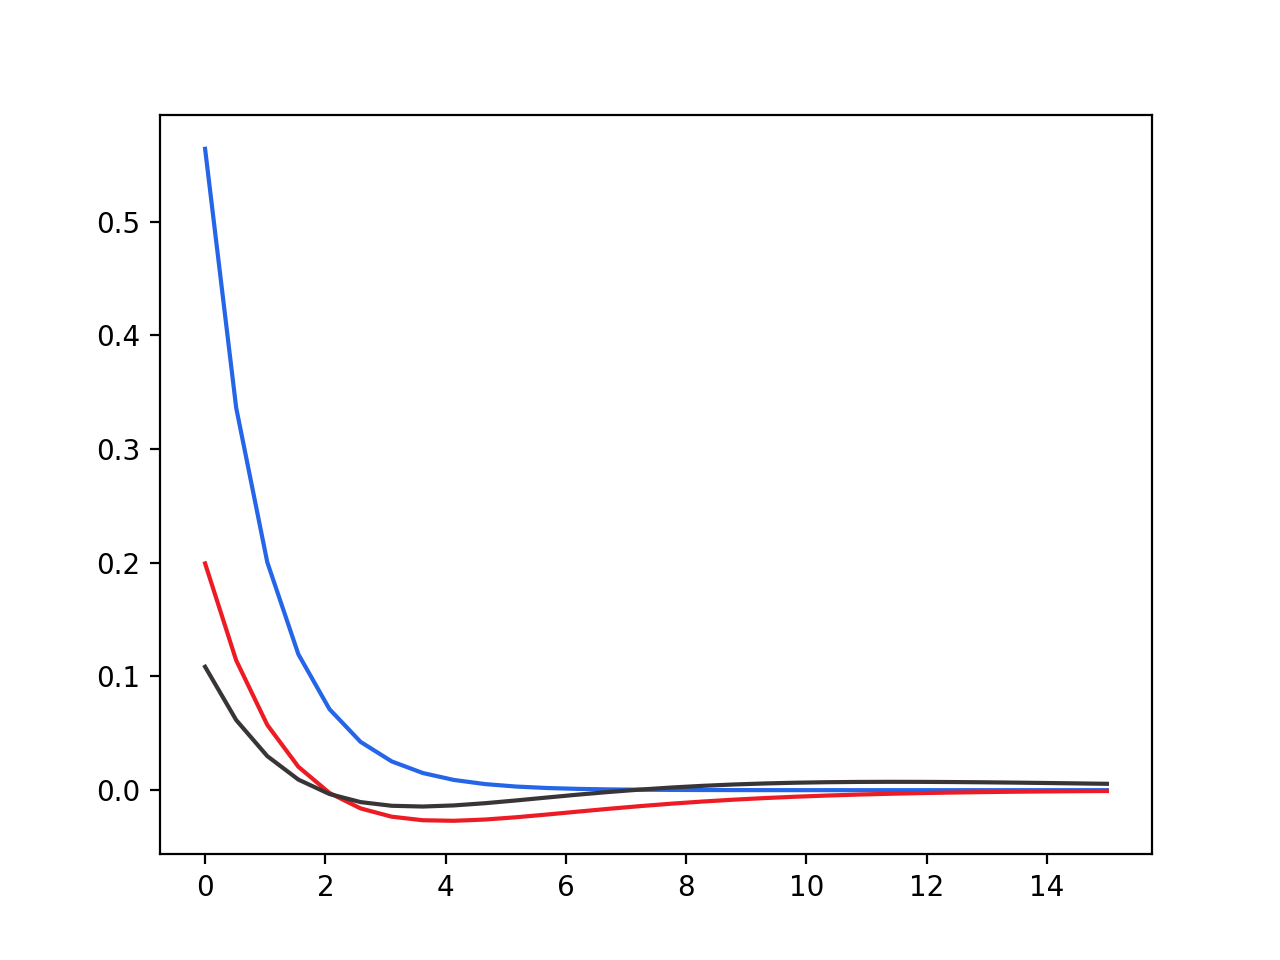

In [8]:
fig, ax = plt.subplots()

ax.plot("r", "1s", data=s_orbitals, color="#2565E8")
ax.plot("r", "2s", data=s_orbitals, color="#ed1c24")
ax.plot("r", "3s", data=s_orbitals, color="#393536")


### Data Labels and Legends

We might also want to label our data and have that show up as a legend in the plot. We add another argument called `label` to the plot command to achieve this. In order for our label to show up, we have to also remember the `ax.legend()` command. 

We might also wish to set a label for the axes. We can use `ax.xlabel` or `ax.ylabel` for to display an axis label.

<IPython.core.display.Javascript object>


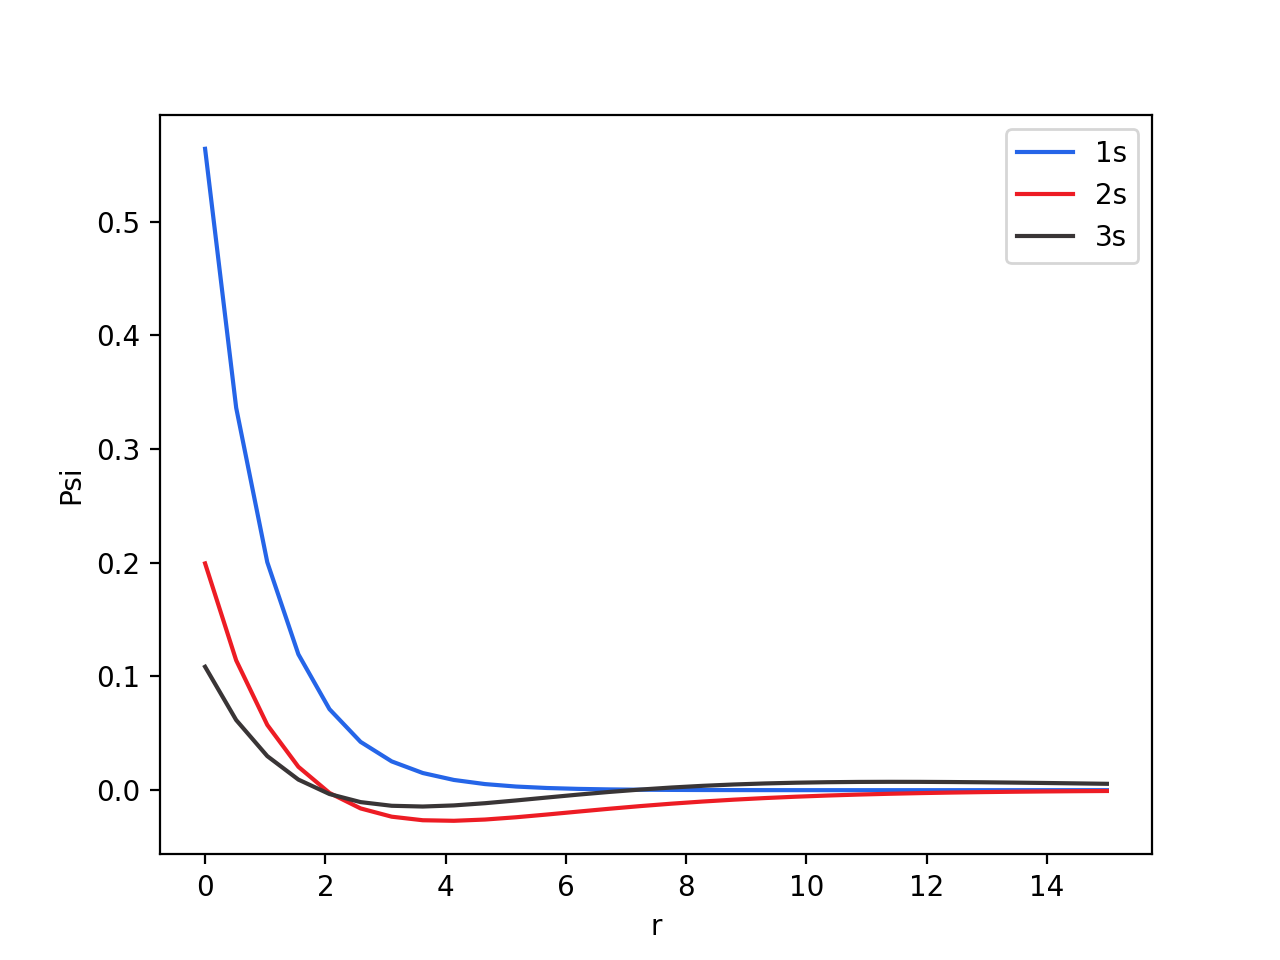

Text(0.5, 0, 'r')

In [9]:
fig, ax = plt.subplots()
ax.plot("r", "1s", data=s_orbitals, color="#2565E8")
ax.plot("r", "2s", data=s_orbitals, color="#ed1c24")
ax.plot("r", "3s", data=s_orbitals, color="#393536")
ax.legend()

ax.set_ylabel("Psi")
ax.set_xlabel("r")

```{note}

When plotting with a pandas dataframe, the column name will automatically be used as the label. If you want to override this, or if you are plotting with something like a numpy array instead, you can add a label to the data when you plot it.

    fig, ax = plt.subplots()
    ax.plot("r", "1s", data=s_orbitals, color="#2565E8", label="1s orbital")
    ax.legend()

```

#### Mathematical Equations and Symbols

Matplotlib supports mathematical expressions in labels as well. We might want to print $\psi$ instead of `Psi` on our y label. To use [math text](https://matplotlib.org/stable/tutorials/text/mathtext.html), put an `r` before your label string, and type your mathematical symbols between dollar signs (`$`). To use a greek symbol, you do a backward slash followed by the word for the symbol

<IPython.core.display.Javascript object>


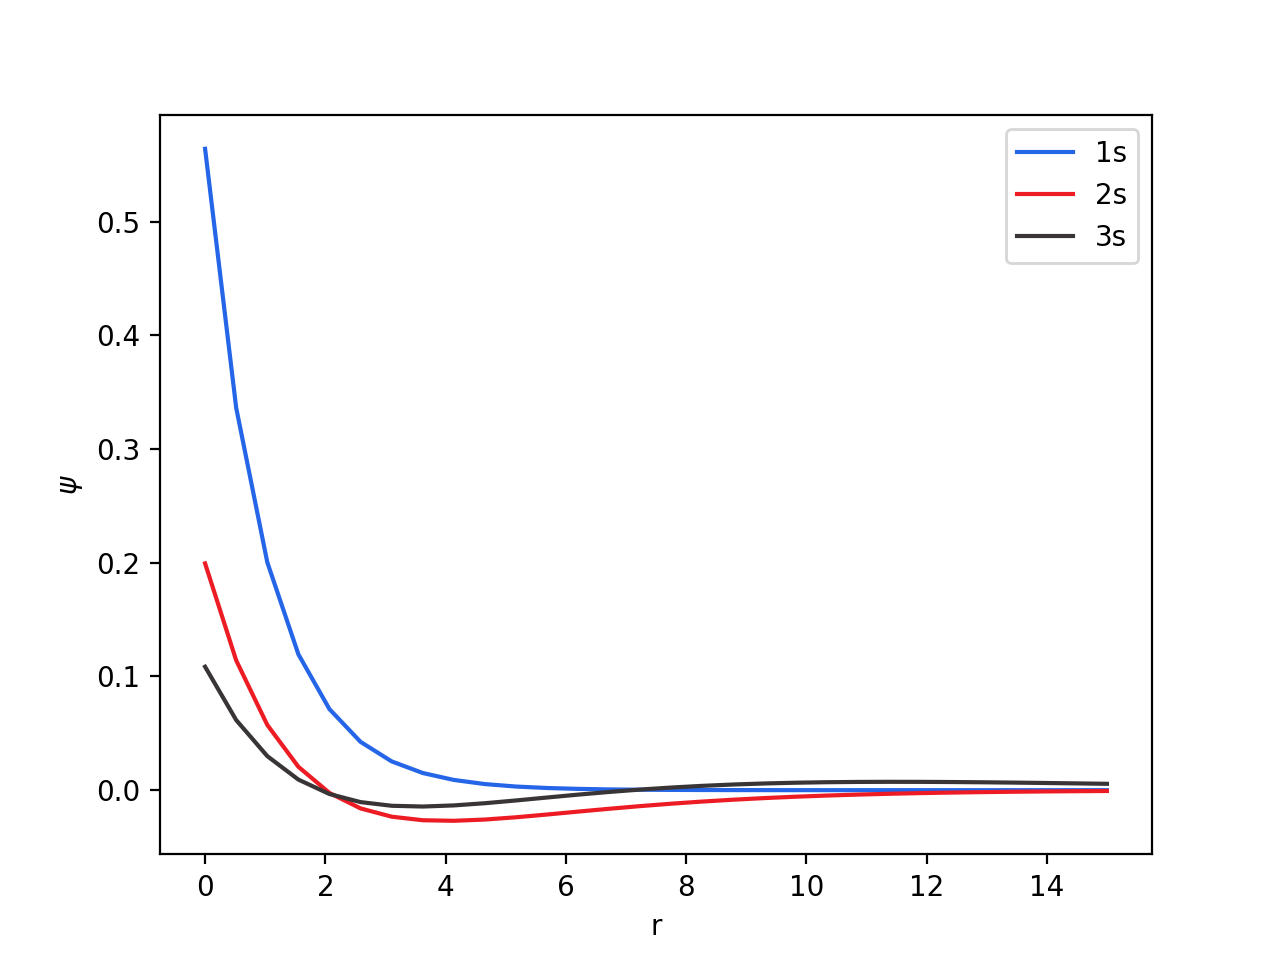

Text(0.5, 0, 'r')

In [10]:
fig, ax = plt.subplots()
ax.plot("r", "1s", data=s_orbitals, color="#2565E8")
ax.plot("r", "2s", data=s_orbitals, color="#ed1c24")
ax.plot("r", "3s", data=s_orbitals, color="#393536")
ax.legend()

ax.set_ylabel(r"$\psi$")
ax.set_xlabel("r")

```{note}

By default, matplotlib will place the legend where it 'best' fits on the plot. You can specify the location, however by adding `loc` to the `legend` function. For example, to place the legend in the upper left corner, you would use 
    
    ax.legend(loc="upper left")
    
Other locations you can use are 'upper right', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'.
```


### Setting Axis Ranges

You may have noticed that our plot area shows before and after our data starts. We might wish to set a custom range for axis in order to better see our data. This is accomplished with `ax.set_xlim` and `ax.set_ylim`. In the plot below, we set the limits for the x axis, so that it only shows us the plot when x is between 0 and 14.

<IPython.core.display.Javascript object>


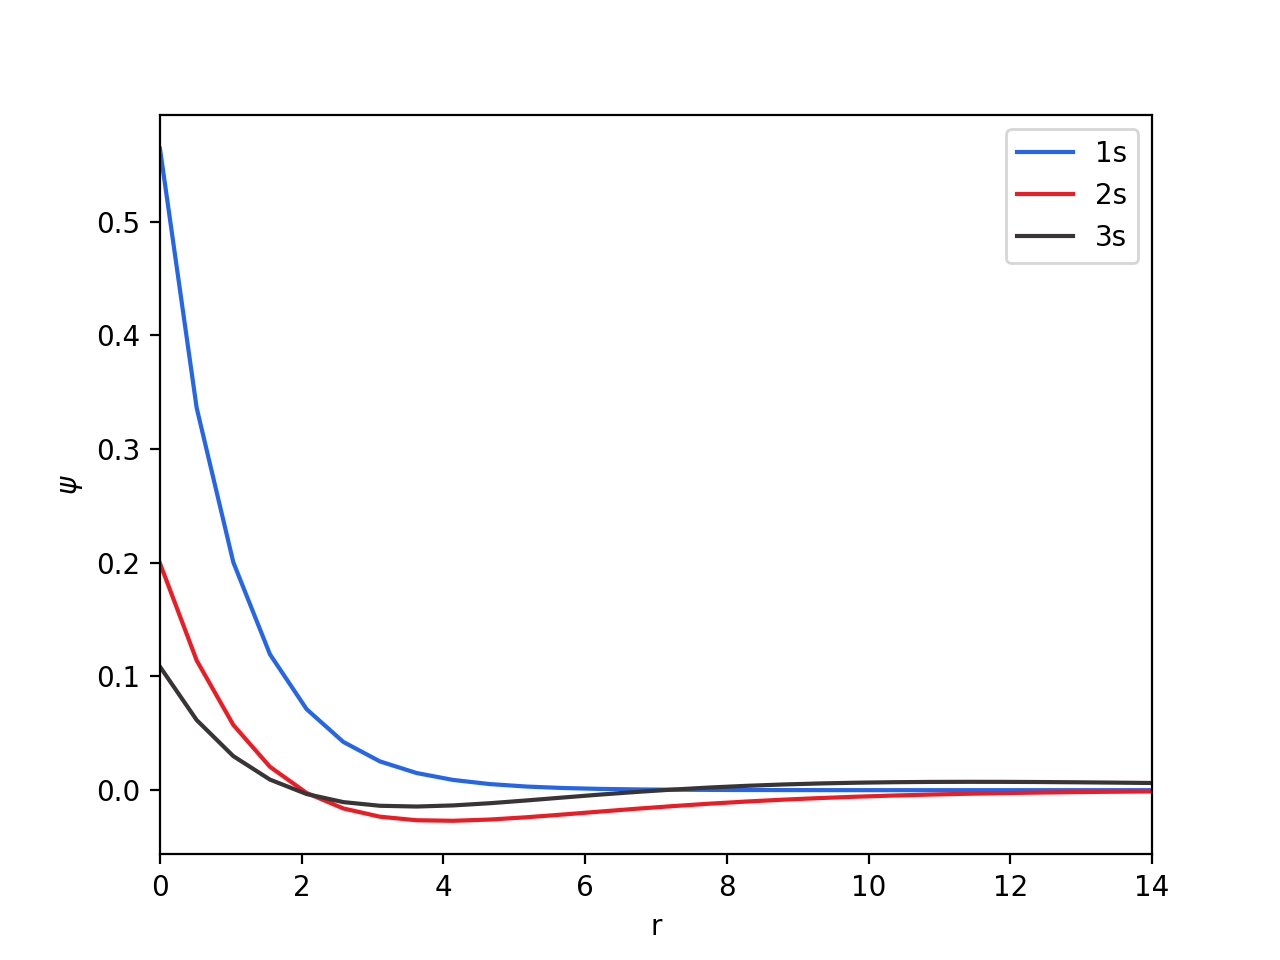

(0.0, 14.0)

In [11]:
fig, ax = plt.subplots()
ax.plot("r", "1s", data=s_orbitals, color="#2565E8")
ax.plot("r", "2s", data=s_orbitals, color="#ed1c24")
ax.plot("r", "3s", data=s_orbitals, color="#393536")
ax.legend()

ax.set_ylabel(r"$\psi$")
ax.set_xlabel("r")
ax.set_xlim(0, 14)

### Setting Font Size

We can increase the font size used for lables by passing an additional parameter (`fontsize`) to the commands which make labels - `set_ylabel`, `set_xlabel` and `legend`.

You can change the size of font used for the axes with the command `ax.tick_params`. You must specify which either `x`, `y` or `both` for the axis, and specify if you want to change major or minor tick labels. 

<IPython.core.display.Javascript object>


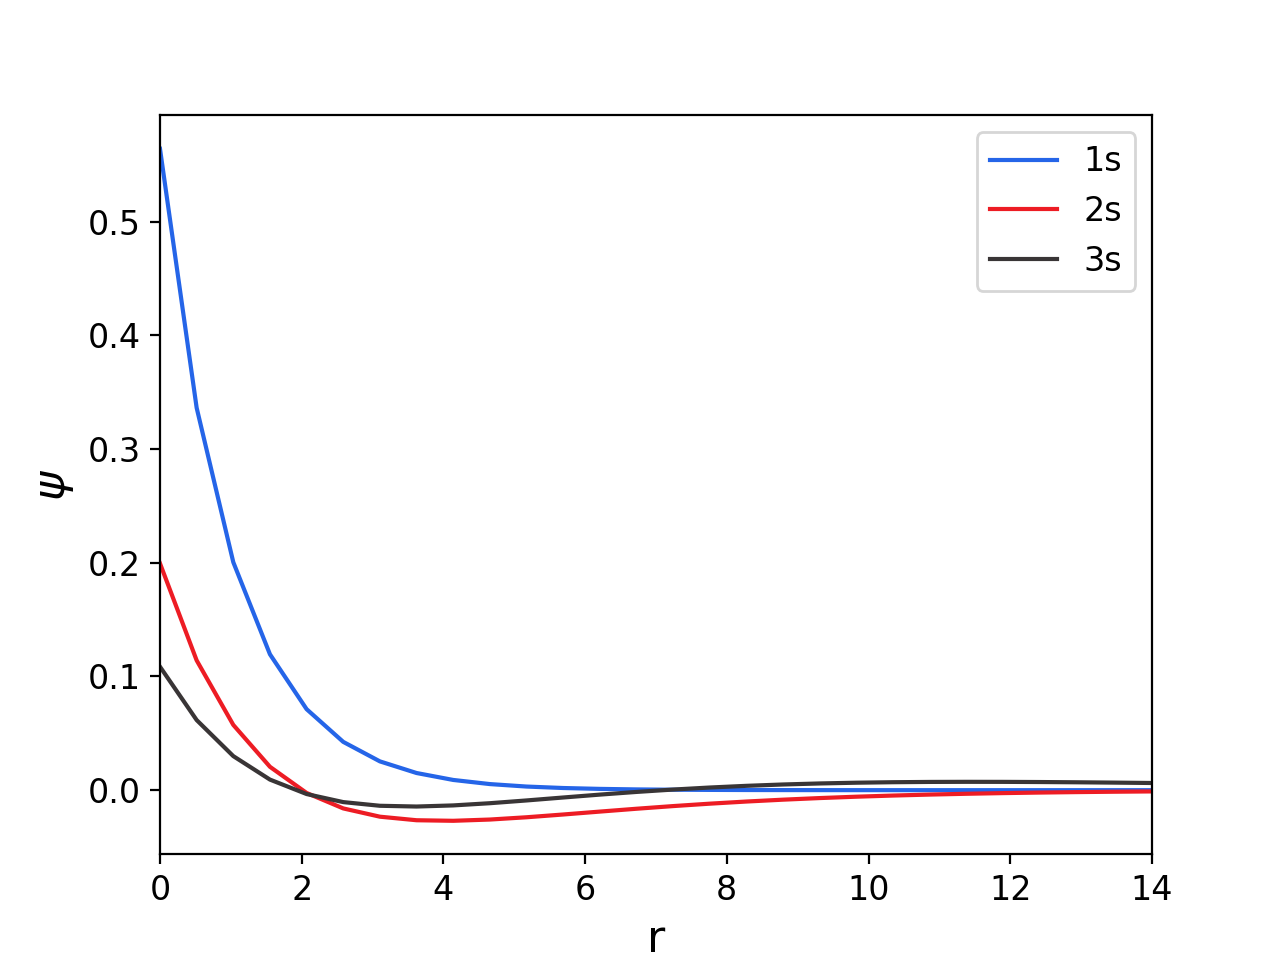

In [12]:
fig, ax = plt.subplots()
ax.plot("r", "1s", data=s_orbitals, color="#2565E8")
ax.plot("r", "2s", data=s_orbitals, color="#ed1c24")
ax.plot("r", "3s", data=s_orbitals, color="#393536")
ax.legend(fontsize=12)

ax.set_ylabel(r"$\psi$", fontsize=16)
ax.set_xlabel("r", fontsize=16)
ax.set_xlim(0, 14)

ax.tick_params(axis="both", which="major", labelsize=12)

```{admonition} Everything is an object...
:class: tip

When we use the object oriented interface, we can access **everything** about the plot through the variables.

For example, we can access the lines on the axis using


    ax.lines

You could see the color you used for the first line by using

    ax.lines[0].get_color()
    
or change the color using

    ax.lines[0].set_color("NEW_COLOR")
    
```



Saving Figures
-----------------

Of course, if you create a figure and want to use it outside of your jupyter notebook, you'll want to save it. You can save your figure using the `fig.savefig` command. There are several options for this command which lets you control the type of image you save as well as the quality.

The image type is controlled by the extension you use for the file name. The command below saves the last figure as a png.

In [13]:
fig.savefig('s_orbitals.png')

You can increase the resolution of your image by adding the argument `dpi`. Typically, a dpi of `300` or so is considered "publication quality". The downside to saving figures with a higher dpi is that they will take longer to save. If you are creating many plots programatically (in other words, creating many plots with code), you may not want to increase the `dpi` of your figure until you're sure it's one you would like to keep.

In [14]:
fig.savefig('s_orbitals_high_quality.png', dpi=300)

You can also make the white areas on the figure transparent, which can be useful on things like posters.

In [15]:
fig.savefig('s_orbitals_high_quality.png', dpi=300, transparent=True)

If you are making the figure for use on a website, you might also consider using the `svg` format. `svg` stands for 'scalable vector graphics'. SVG files are saved as text and rendered as images by your browser, meaning they are very high quality. If you choose to use `svg`, good options for editing these are [Inkscape](https://inkscape.org/) (free and open source) or Adobe Illustrator.

In [16]:
fig.savefig('s_orbitals_high_quality.svg')